<a href="https://colab.research.google.com/github/Shazin157/Student_Performance_Predict/blob/main/ML_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Load data
df = pd.read_csv("student-mat.csv", sep=';')

# Add a binary column for classification
df['pass'] = (df['G3'] >= 10).astype(int)

# Selected features
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
X = df[features]

# Targets
y_class = df['pass']
y_reg = df['G3']


--- Classification Report ---
Logistic Regression Accuracy: 0.8987
Decision Tree Accuracy: 0.8987
Best Classification Model: Logistic Regression (Accuracy: 0.8987)


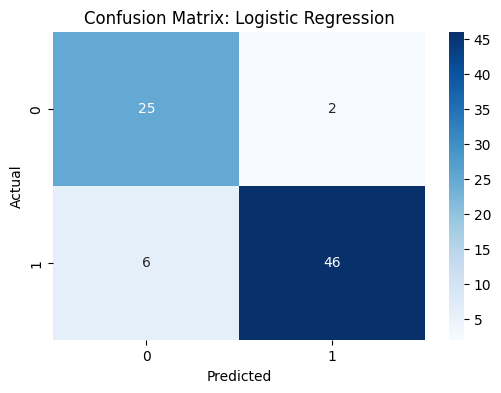

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic Regression (Baseline)
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Classification results
classification_results = {
    "Logistic Regression": acc_lr,
    "Decision Tree": acc_dt
}

# Best classification model
best_classification_model = max(classification_results, key=classification_results.get)

print("\n--- Classification Report ---")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Best Classification Model: {best_classification_model} (Accuracy: {classification_results[best_classification_model]:.4f})")

# Confusion Matrix plot (best model)
best_clf = clf_lr if best_classification_model == "Logistic Regression" else clf_dt
best_pred = y_pred_lr if best_classification_model == "Logistic Regression" else y_pred_dt

plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, best_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {best_classification_model}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Regression Report ---
Linear Regression MSE: 4.4665
Decision Tree Regressor MSE: 2.2500
Best Regression Model: Decision Tree Regressor (MSE: 2.2500)


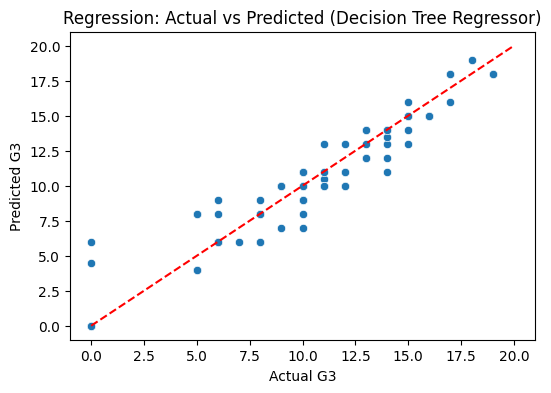

In [ ]:

# Linear Regression (Baseline)
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_reg[y_train.index])
y_pred_reg_lr = reg_lr.predict(X_test)
mse_lr = mean_squared_error(y_reg[y_test.index], y_pred_reg_lr)

# Decision Tree Regressor
reg_dt = DecisionTreeRegressor(random_state=42)
reg_dt.fit(X_train, y_reg[y_train.index])
y_pred_reg_dt = reg_dt.predict(X_test)
mse_dt = mean_squared_error(y_reg[y_test.index], y_pred_reg_dt)

# Regression results
regression_results = {
    "Linear Regression": mse_lr,
    "Decision Tree Regressor": mse_dt
}

# Best regression model (lower MSE is better)
best_regression_model = min(regression_results, key=regression_results.get)

print("\n--- Regression Report ---")
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor MSE: {mse_dt:.4f}")
print(f"Best Regression Model: {best_regression_model} (MSE: {regression_results[best_regression_model]:.4f})")

# Plot: Actual vs Predicted (best model)
best_reg = reg_lr if best_regression_model == "Linear Regression" else reg_dt
best_pred_reg = y_pred_reg_lr if best_regression_model == "Linear Regression" else y_pred_reg_dt

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_reg[y_test.index], y=best_pred_reg)
plt.plot([0, 20], [0, 20], '--', color='red')
plt.title(f"Regression: Actual vs Predicted ({best_regression_model})")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Show cluster means
print("\n--- Cluster Summary ---")
print(df.groupby('cluster')[features].mean())


--- Cluster Summary ---
         studytime  failures  absences         G1         G2
cluster                                                     
0         2.075377  0.150754  6.989950   9.110553   8.919598
1         2.136364  0.084416  4.292208  14.305195  14.214286
2         1.476190  2.119048  4.833333   6.976190   6.380952


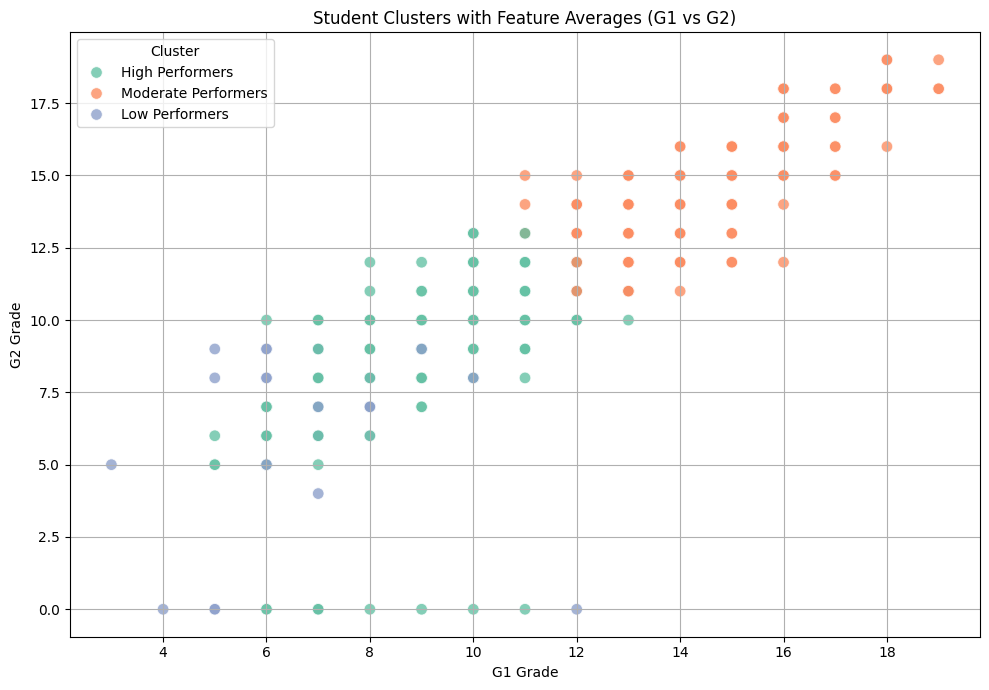

In [ ]:
# Define custom names for each cluster
cluster_names = {0: "High Performers", 1: "Moderate Performers", 2: "Low Performers"}

# Select any two features to plot (e.g., G1 and G2)
plt.figure(figsize=(10, 7))

# Scatter plot with two selected features
sns.scatterplot(data=df, x='G1', y='G2', hue='cluster', palette='Set2', s=70, alpha=0.8)

# Compute the mean values of each feature for every cluster
cluster_summary = df.groupby('cluster')[features].mean()


# Customize the legend with your own cluster names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [cluster_names[int(label)] for label in labels]  # Update labels with custom names
plt.legend(handles, labels, title="Cluster")

# Add plot labels and title
plt.title("Student Clusters with Feature Averages (G1 vs G2)")
plt.xlabel("G1 Grade")
plt.ylabel("G2 Grade")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def predict_student_performance(studytime, failures, absences, G1, G2):
    new_data = pd.DataFrame([[studytime, failures, absences, G1, G2]], columns=features)

    # Classification prediction
    class_model = clf_lr if best_classification_model == "Logistic Regression" else clf_dt
    class_result = class_model.predict(new_data)[0]
    class_label = "Pass" if class_result == 1 else "Fail"

    # Regression prediction
    reg_model = reg_lr if best_regression_model == "Linear Regression" else reg_dt
    grade_prediction = reg_model.predict(new_data)[0]

    # Clustering prediction (using KMeans only for simplicity)
    cluster_result = kmeans.predict(scaler.transform(new_data))[0]

    print("\n--- New Student Prediction ---")
    print(f"Classification ({best_classification_model}): {class_label}")
    print(f"Predicted Final Grade ({best_regression_model}): {grade_prediction:.2f}")
    print(f"Cluster Group (KMeans): {cluster_result}")

# Example usage
studytime = float(input("Enter study time (1, 2, 3, or 4): "))
failures = int(input("Enter the number of previous failures: "))
absences = int(input("Enter the number of absences: "))
G1 = float(input("Enter the first period grade (G1): "))
G2 = float(input("Enter the second period grade (G2): "))

predict_student_performance(studytime, failures, absences, G1, G2)

Enter study time (1, 2, 3, or 4): 4
Enter the number of previous failures: 0
Enter the number of absences: 0
Enter the first period grade (G1): 10
Enter the second period grade (G2): 10

--- New Student Prediction ---
Classification (Logistic Regression): Pass
Predicted Final Grade (Decision Tree Regressor): 10.00
Cluster Group (KMeans): 0
